# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Assignment: Double DQN in CartPole enviroment

## Learning Objectives

At the end of the experiment, you will be able to:

* understand the Double DQN Algorithm.
* implementation of DDQN algorithm in CartPole environment.

### Setup Steps:

In [8]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2302794" #@param {type:"string"}

In [9]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9008710123" #@param {type:"string"}

In [10]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "AIAS_B2_M4_AST_07_DDQN_CartPole_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Introduction

### The Cartpole Environment: Balancing a Pole on a Cart

The Cartpole environment is a classic benchmark task in the field of reinforcement learning (RL). It's widely used because it's:

* **Simple:** Easy to understand and implement, making it a great starting point for learning RL concepts.
* **Challenging:** Mastering the task requires learning effective control strategies, making it a good testbed for various algorithms.
* **Informative:** Offers valuable insights into the strengths and weaknesses of different RL approaches.

Here's a deeper dive into the Cartpole environment:

**The Setup:**

* Imagine a pole attached by a hinge to a cart moving freely on a frictionless track.
* The agent can apply force to the cart in either direction (left or right).
* The goal is to balance the pole upright for as long as possible by applying appropriate forces based on observations.

**Observations:**

The agent receives four observations at each step:

1. **Cart position:** Where the cart is located on the track (positive for right, negative for left).
2. **Cart velocity:** How fast the cart is moving.
3. **Pole angle:** The angle of the pole with respect to the vertical (positive for tilting to the right, negative for tilting to the left).
4. **Pole velocity:** How fast the angle of the pole is changing.

The continuous state space is an X coordinate for location, the velocity of the cart, the angle of the pole, and the velocity at the tip of the pole. The X coordinate goes from -4.8 to +4.8, velocity is -Inf to +Inf, angle of the pole goes from -24 degrees to +24 degrees, tip velocity is -Inf to +Inf. With all of the possible combinations you can see why we can't create a Q table for each one.

**Actions:**

The agent can choose one of two actions at each step:

1. **Push cart to the right:** Applies a force to the right side of the cart.
2. **Push cart to the left:** Applies a force to the left side of the cart.

The actions are 0 to push the cart to the left and 1 to push the cart to the right.

**Rewards:**

The agent receives a reward of +1 for every timestep the pole stays upright. No additional reward is given for pushing the cart in either direction.



**Challenges:**

* The Cartpole environment is unstable and highly nonlinear. Small changes in the cart's position or velocity can significantly affect the pole's balance.
* The agent needs to learn a fine-grained control strategy to apply just the right amount of force at the right time to keep the pole balanced.
* There are multiple solutions to the task, so the agent needs to discover an effective policy that works consistently under different initial conditions.




To "solve" this puzzle you have to have an average reward of > 195 over 100 consecutive episodes.

**Applications:**

The Cartpole environment serves as a stepping stone for various RL applications, including:

* **Control systems:** Learning to stabilize real-world systems like robots or drones.
* **Dynamic decision-making:** Making optimal choices in situations with changing dynamics and uncertain outcomes.
* **Policy optimization:** Developing efficient algorithms for learning control strategies from rewards and observations.

By mastering the Cartpole environment, RL learners gain valuable experience and insights applicable to more complex tasks in diverse domains.





### Import required packages

In [15]:
#Imports and gym creation
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import tensorflow as tf
from tensorflow import keras
#import stable_baselines3
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import random



In [16]:
#Create Gym
from gym import wrappers
envCartPole = gym.make('CartPole-v1')
envCartPole.seed(50)

[50]

In [17]:
EPISODES = 500
TRAIN_END = 0

In [18]:
def discount_rate(): #Gamma
    return 0.95

def learning_rate(): #Alpha
    return 0.001

def batch_size():
    return 24

### DOUBLE DEEP Q-LEARNING



Double Deep Q-Learning (DDQN) is an improvement over Deep Q-Learning (DQN) that **reduces overestimation bias** in action-value estimates. This bias can lead to suboptimal decisions by the agent, as it often overestimates the rewards expected from taking certain actions. Before discussing about DDQN lets discuss some brief about Q-Learning, and DQN.


Deep Q-Learning (DQN) is a powerful reinforcement learning algorithm that combines Q-learning with deep neural networks. It allows agents to learn optimal actions in complex environments with large state and action spaces. Here's a breakdown of the key concepts:

**1. Q-Learning:**

Q-learning is a **model-free** reinforcement learning algorithm that learns **action-value functions**, also known as **Q-values**. These Q-values estimate the **expected future reward** of taking a specific action in a given state. Over time, the agent updates its Q-values based on its experiences, ultimately aiming to choose actions that maximize its long-term rewards.

**2. Deep Neural Networks:**

DQN replaces the traditional Q-value lookup table with a **deep neural network**. This network takes the current state of the environment as input and outputs a Q-value for each possible action. By training this network on experience data, DQN can learn complex Q-functions that adapt to diverse environments.

**3. Training Process:**

Here's how DQN learns:

* **Experience replay:** The agent stores its experiences in a replay memory, consisting of transitions between states, actions, rewards, and next states. This allows the agent to learn from past experiences more efficiently than just relying on the current state.
* **Batch learning:** The agent samples mini-batches of experiences from the replay memory and uses them to update its Q-network. This update minimizes the **Bellman equation**, which relates the Q-value of a state-action pair to the expected future rewards obtained by taking that action.
* **Target network:** To reduce overestimation bias, DQN employs a **target network** that is a slow copy of the main Q-network. The target network is used to evaluate the Q-values predicted by the main network during updates, leading to more stable and accurate learning.

**4. Strengths:**

* **Scalability:** DQN can handle large state and action spaces effectively, making it suitable for complex tasks.
* **Generalization:** The deep neural network allows DQN to generalize from past experiences to unseen situations, improving its adaptability.
* **Sample efficiency:** By using experience replay, DQN can learn effectively even with limited interaction with the environment.

**5. Weaknesses:**

* **Computational cost:** Training deep neural networks can be computationally expensive and require significant resources.
* **Hyperparameter tuning:** Selecting the optimal hyperparameters for the deep network and training process can be challenging.
* **Overestimation bias:** DQN can overestimate Q-values due to the correlation between action selection and evaluation within the same network. Double Deep Q-Learning (DDQN) addresses this issue by using separate networks for selection and evaluation.

**Overall, DQN is a powerful reinforcement learning algorithm that has revolutionized the field. Its ability to learn complex Q-functions from experience makes it a valuable tool for tackling diverse tasks in areas like robotics, video game playing, and resource management.**



Here's the core idea behind DDQN:

**1. Two Q-networks:** DDQN utilizes **two separate Q-networks**:

- **Main Q-network:** This network is used to **select the best action** in a given state based on its estimated Q-values.
- **Target Q-network:** This network is a slower copy of the main network, used to **evaluate the Q-values** of the actions chosen by the main network. Updating the target network happens periodically by copying the weights of the main network.


DDQN overcomes this by **decoupling action selection and evaluation**:

- The **main network chooses the action with the highest Q-value** according to its own estimates.
- The **target network evaluates the Q-value of this chosen action**.

This separation reduces the bias, as the network used for evaluation is not influenced by the selection process.

**3. Benefits of DDQN:**

- Improved convergence and stability during training.
- Better performance in complex tasks with long reward horizons.
- More robust to overestimation bias compared to DQN.

**4. Implementation:**

DDQN uses the same update process as DQN, with the exception of using the separate target network for evaluation:

**example**


Imagine you're playing a maze game where you need to collect coins and reach the exit. You have two maps:

- **Map 1 (Main Map):** You use this map to find the currently best path based on your estimated coin values.
- **Map 2 (Double Map):** This map is a slower update of Map 1 and you use it to verify the actual value of the path you picked from Map 1.

**Scenario:**

1. You're at a fork in the road on Map 1. Both paths seem to lead to coins, but one path has a slightly higher estimated value on Map 1.
2. You take the path with the higher estimated value, following your "greedy" strategy based on Map 1.
3. However, when you reach that path on Map 2, you discover there are fewer coins than Map 1 estimated. This is the overestimation bias!


**How DDQN fixes this:**

- In DDQN, you use the **Double Map (Target Network)** to evaluate the path chosen by the **Main Map (Main Network)**, not the same map that chose it. This separation prevents the overestimation bias.
- By verifying the value of the chosen path through the Double Map, you get a more accurate picture of its true reward. This helps you learn better and make more optimal decisions in the future.

**Benefits in the Maze Game:**

- Using DDQN, you're less likely to be fooled by misleading paths with inflated values on the Main Map.
- You learn to trust the verified paths from the Double Map, leading to faster and more efficient coin collection.
- Overall, you perform better and reach the exit quicker compared to relying solely on the Main Map's estimates.

 **Here's another example to illustrate DDQN, this time in a financial investment setting:**

**Imagine you're an investment agent tasked with allocating funds across different assets to maximize returns. You have two models:**

- **Main Model:** This model predicts the expected returns of each asset based on current market conditions.
- **Target Model:** This model is a slower-updating copy of the Main Model, used to evaluate the predicted returns more cautiously.

**Scenario:**

1. The Main Model predicts that Asset A has a potential return of 10%, while Asset B has a predicted return of 8%.
2. Following a greedy strategy, you allocate more funds to Asset A, expecting higher returns.
3. However, the Target Model, with its more conservative estimates, predicts that Asset A's actual return is likely closer to 7%, while Asset B's return is closer to 8%.

**How DDQN addresses this:**

- DDQN uses the Target Model's evaluation to adjust the Main Model's predictions, reducing the overestimation bias.
- In this case, the Main Model learns to temper its expectations for Asset A, leading to a more balanced allocation strategy.

**Benefits in Investment:**

- DDQN helps prevent over-allocation to assets with potentially inflated returns, reducing risk exposure.
- It encourages more realistic return expectations, leading to more stable and sustainable portfolio growth.
- It improves overall investment performance by mitigating overestimation bias.






**Remember:**

- DDQN is like having a trusted friend double-check your decisions before you commit to them.
- This double-checking reduces bias and leads to better learning and performance.




**Summary:**

Double Deep Q-Learning is a powerful technique for reinforcement learning that reduces overestimation bias and improves performance in complex tasks. Its use of separate Q-networks for action selection and evaluation makes it a valuable tool for agents to learn optimal behaviors more effectively.





In [19]:
class DoubleDeepQNetwork():
    def __init__(self, states, actions, alpha, gamma, epsilon,epsilon_min, epsilon_decay):
        self.nS = states
        self.nA = actions
        self.memory = deque([], maxlen=2500)
        self.alpha = alpha
        self.gamma = gamma
        #Explore/Exploit
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.model = self.build_model()
        self.model_target = self.build_model() #Second (target) neural network
        self.update_target_from_model() #Update weights
        self.loss = []

    def build_model(self):
        model = keras.Sequential() #linear stack of layers https://keras.io/models/sequential/
        model.add(keras.layers.Dense(24, input_dim=self.nS, activation='relu')) #[Input] -> Layer 1
        #   Dense: Densely connected layer https://keras.io/layers/core/
        #   24: Number of neurons
        #   input_dim: Number of input variables
        #   activation: Rectified Linear Unit (relu) ranges >= 0
        model.add(keras.layers.Dense(24, activation='relu')) #Layer 2 -> 3
        model.add(keras.layers.Dense(self.nA, activation='linear')) #Layer 3 -> [output]
        #   Size has to match the output (different actions)
        #   Linear activation on the last layer
        model.compile(loss='mean_squared_error', #Loss function: Mean Squared Error
                      optimizer=keras.optimizers.Adam(lr=self.alpha)) #Optimaizer: Adam (Feel free to check other options)
        return model

    def update_target_from_model(self):
        #Update the target model from the base model
        self.model_target.set_weights( self.model.get_weights() )

    def action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.nA) #Explore
        action_vals = self.model.predict(state) #Exploit: Use the NN to predict the correct action from this state
        return np.argmax(action_vals[0])

    def test_action(self, state): #Exploit
        action_vals = self.model.predict(state)
        return np.argmax(action_vals[0])

    def store(self, state, action, reward, nstate, done):
        #Store the experience in memory
        self.memory.append( (state, action, reward, nstate, done) )

    def experience_replay(self, batch_size):
        #Execute the experience replay

        #1. Sample a Mini - Batch.
        minibatch = random.sample( self.memory, batch_size ) #Randomly sample from memory

        #2. Prepare State and Next State arrays
        #Convert to numpy for speed by vectorization
        st = np.zeros((batch_size, self.nS))  # States
        nst = np.zeros((batch_size, self.nS))  # Next States
        for i in range(batch_size):  # Creating the state and next state np arrays
          st[i] = minibatch[i][0].reshape(-1, self.nS)
          nst[i] = minibatch[i][3].reshape(-1, self.nS)

        #3. Predict Q-Values
        st_predict = self.model.predict(st,verbose=0) #Here is the speedup! I can predict on the ENTIRE batch
        nst_predict = self.model.predict(nst,verbose=0)
        nst_predict_target = self.model_target.predict(nst,verbose=0) #Predict from the TARGET

        #4. Compute Target Q-Values
        x = []
        y = []
        index = 0
        for state, action, reward, nstate, done in minibatch:
            x.append(state)
            #Predict from state
            nst_action_predict_target = nst_predict_target[index]
            nst_action_predict_model = nst_predict[index]
            if done == True: #Terminal: Just assign reward much like {* (not done) - QB[state][action]}
                target = reward
            else:   #Non terminal
                target = reward + self.gamma * nst_action_predict_target[np.argmax(nst_action_predict_model)] #Using Q to get T is Double DQN
            target_f = st_predict[index]
            target_f[action] = target
            y.append(target_f)
            index += 1
        #Reshape for Keras Fit
        x_reshape = np.array(x).reshape(batch_size,self.nS)
        y_reshape = np.array(y)
        epoch_count = 1
        hist = self.model.fit(x_reshape, y_reshape, epochs=epoch_count, verbose=0)
        #Graph Losses
        for i in range(epoch_count):
            self.loss.append( hist.history['loss'][i] )
        #Decay Epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

#### Create the agent for training

In [20]:
#Create the agents
nS = envCartPole.observation_space.shape[0] #This is only 4
nA = envCartPole.action_space.n #Actions
dqn = DoubleDeepQNetwork(nS, nA, learning_rate(), discount_rate(), 1, 0.001, 0.995 )

batch_size = batch_size()

#### Training the model

In [21]:
#Training
rewards = [] #Store rewards for graphing
epsilons = [] # Store the Explore/Exploit
TEST_Episodes = 0
for e in range(EPISODES):
    state = envCartPole.reset()
    state = np.reshape(state, [1, nS]) # Resize to store in memory to pass to .predict
    tot_rewards = 0
    for time in range(210): #200 is when you "solve" the game. This can continue forever as far as I know
        envCartPole.render()
        action = dqn.action(state)
        nstate, reward, done, _ = envCartPole.step(action)
        nstate = np.reshape(nstate, [1, nS])
        tot_rewards += reward
        dqn.store(state, action, reward, nstate, done) # Resize to store in memory to pass to .predict
        state = nstate
        #done: CartPole fell.
        #time == 209: CartPole stayed upright
        if done or time == 209:
            rewards.append(tot_rewards)
            epsilons.append(dqn.epsilon)
            print("episode: {}/{}, score: {}, e: {}"
                  .format(e, EPISODES, tot_rewards, dqn.epsilon))
            break
        #Experience Replay
        if len(dqn.memory) > batch_size:
            dqn.experience_replay(batch_size)
    #Update the weights after each episode (You can configure this for x steps as well
    dqn.update_target_from_model()
    #If our current NN passes we are done
    #I am going to use the last 5 runs
    if len(rewards) > 5 and np.average(rewards[-5:]) > 195:
        #Set the rest of the EPISODES for testing
        TEST_Episodes = 100    # EPISODES - e
        TRAIN_END = e
        break

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 21ms/step
episode: 48/500, score: 167.0, e: 0.0009954703940636294
1/1 [==============================] - 0s 23ms/step
episode: 49/500, score: 129.0, e: 0.0009954703940636294
1/1 [==============================] - 0s 19ms/step
episode: 50/500, score: 56.0, e: 0.0009954703940636294
1/1 [==============================] - 0s 21ms/step
episode: 51/500, score: 78.0, e: 0.0009954703940636294
1/1 [==============================] - 0s 42ms/step
episode: 52/500, score: 64.0, e: 0.0009954703940636294
1/1 [==============================] - 0s 22ms/step
episode: 53/500, score: 52.0, e: 0.0009954703940636294
1/1 [==============================] - 0s 30ms/step
episode: 54/500, score: 93.0, e: 0.0009954703940636294
1/1 [==============================] - 0s 22ms/step
episode: 55/500, score: 70.0, e: 0.0009954703940636294
1/1 [==============================] - 0s 30ms/step
episode: 56/500, score: 73.0, e: 0.0009

### Testing

In [22]:
#Testing

#TEST Time
#   In this section we ALWAYS use exploit don't train any more
for e_test in range(TEST_Episodes):
    state = envCartPole.reset()
    state = np.reshape(state, [1, nS])
    tot_rewards = 0
    for t_test in range(210):
        action = dqn.test_action(state)
        nstate, reward, done, _ = envCartPole.step(action)
        nstate = np.reshape( nstate, [1, nS])
        tot_rewards += reward
        #DON'T STORE ANYTHING DURING TESTING
        state = nstate
        #done: CartPole fell.
        #t_test == 209: CartPole stayed upright
        if done or t_test == 209:
            rewards.append(tot_rewards)
            epsilons.append(0) #We are doing full exploit
            print("episode: {}/{}, score: {}, e: {}"
                  .format(e_test, TEST_Episodes, tot_rewards, 0))
            break;

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 26ms/step
episode: 75/100, score: 210.0, e: 0
1/1 [==============================] - 0s 40ms/step
episode: 76/100, score: 187.0, e: 0
1/1 [==============================] - 0s 27ms/step
episode: 77/100, score: 210.0, e: 0
1/1 [==============================] - 0s 30ms/step
episode: 78/100, score: 210.0, e: 0
1/1 [==============================] - 0s 23ms/step
episode: 79/100, score: 195.0, e: 0
1/1 [==============================] - 0s 30ms/step
episode: 80/100, score: 210.0, e: 0
1/1 [==============================] - 0s 38ms/step
episode: 81/100, score: 202.0, e: 0
1/1 [==============================] - 0s 27ms/step
episode: 82/100, score: 210.0, e: 0
1/1 [==============================] - 0s 50ms/step
episode: 83/100, score: 197.0, e: 0
1/1 [==============================] - 0s 29ms/step
episode: 84/100, score: 210.0, e: 0
1/1 [==============================] - 0s 54ms/step
episode: 85/100, 

### Plotting

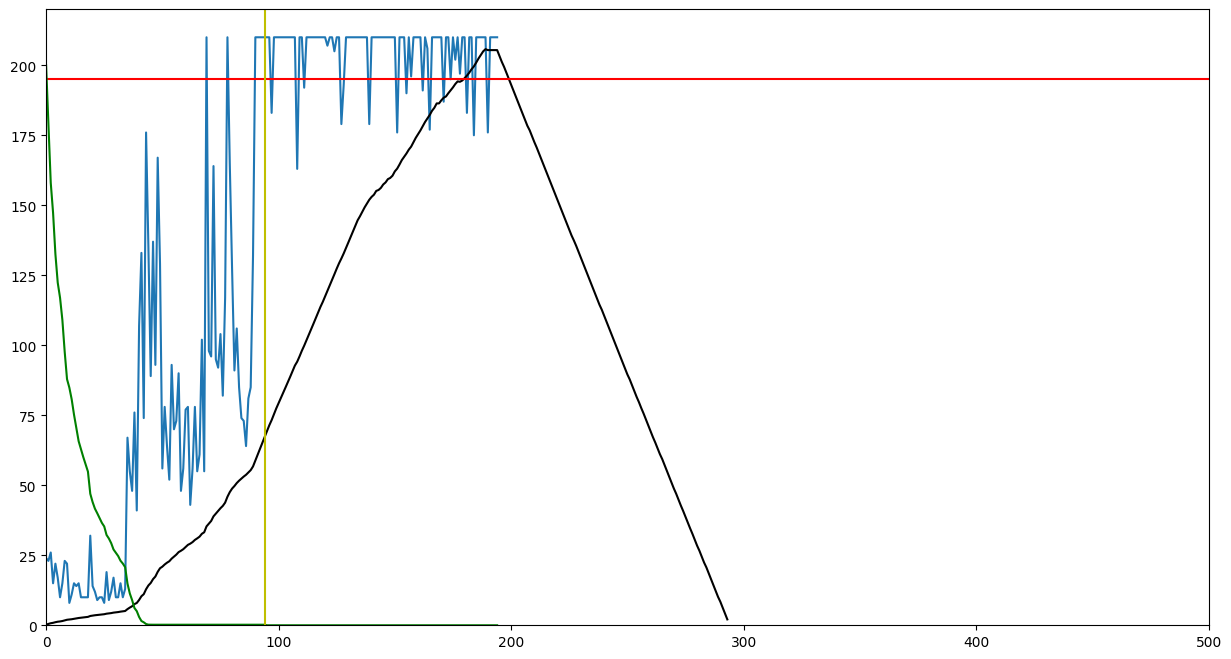

In [23]:
#Plotting
rolling_average = np.convolve(rewards, np.ones(100)/100)
plt.figure(figsize=(15,8))
plt.plot(rewards)
plt.plot(rolling_average, label='Double Q-learning', color='black')
plt.axhline(y=195, color='r', linestyle='-') #Solved Line
#Scale Epsilon (0.001 - 1.0) to match reward (0 - 200) range
eps_graph = [200*x for x in epsilons]
plt.plot(eps_graph, label='epsilon', color='g', linestyle='-')
#Plot the line where TESTING begins
plt.axvline(x=TRAIN_END, color='y', linestyle='-')
plt.xlim( (0,EPISODES) )
plt.ylim( (0,220) )
plt.show()

### Please answer the questions below to complete the experiment:




In [24]:
# @title  What is the primary motivation behind Double Q-learning? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = " To address the overestimation bias in Q-values." #@param ["","To speed up the convergence of the Q-learning algorithm."," To address the overestimation bias in Q-values.", " To reduce the size of the Q-table.", "To improve exploration in the learning process."]

In [25]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [26]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "It was good and challenging for me" #@param {type:"string"}


In [27]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [28]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [30]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1077
Date of submission:  19 Jul 2024
Time of submission:  23:26:20
View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions
